<a href="https://colab.research.google.com/github/PYMaksim/Neural-network-project/blob/main/Neural_network_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download and look at the data
import pandas as pd

bank = pd.read_csv ('bank-additional.csv', sep =';')
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


The goal is to create a model with an accuracy of 90% or more . Explore neural networks.

A few words about the dataset:

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).



In [ ]:
# see if there are any missing values ?
missing_bank = pd.concat([
    bank.isnull().sum(),
    bank.isnull().mean()
], axis=1)
missing_bank.rename(columns={0: 'Omissions', 1: '% Omissions'}, inplace=True)
display(missing_bank)
# Great ! No missing values

,Omissions,% Omissions
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
day_of_week,0,0.0



**Description of attributes**

*age, job, marital, education,*

*default* – overdue loans of the client.

*housing* – availability of a mortgage loan from the client

*loan* – customer's consumer credit.

*contact* – communication method

*month* – month when the attempt to contact the client was made.

*day_of_week*– the day of the week on which the attempt to contact the client was made.

*duration* – duration of conversation/contact with the client.

*campaign* – number of contacts

*pdays*– the number of days since the last contact with the customer before the current attempt.

*previous* – number of previous attempts to contact the customer.

*poutcome* – the result of the previous attempt to contact the client (successful/unsuccessful).

*emp.var.rate*– Change in the unemployment rate (rate of change in the number of jobs).

*cons.price.idx* – Consumer price index (change in the cost of goods and services for consumers).

*cons.conf.idx* – Consumer confidence index (level of consumer confidence in the economy).

*euribor3m* – three-month EURIBOR interest rate (European Interbank Offered Rate).

*nr.employed* – total number of people employed.

*y* – Target variable.




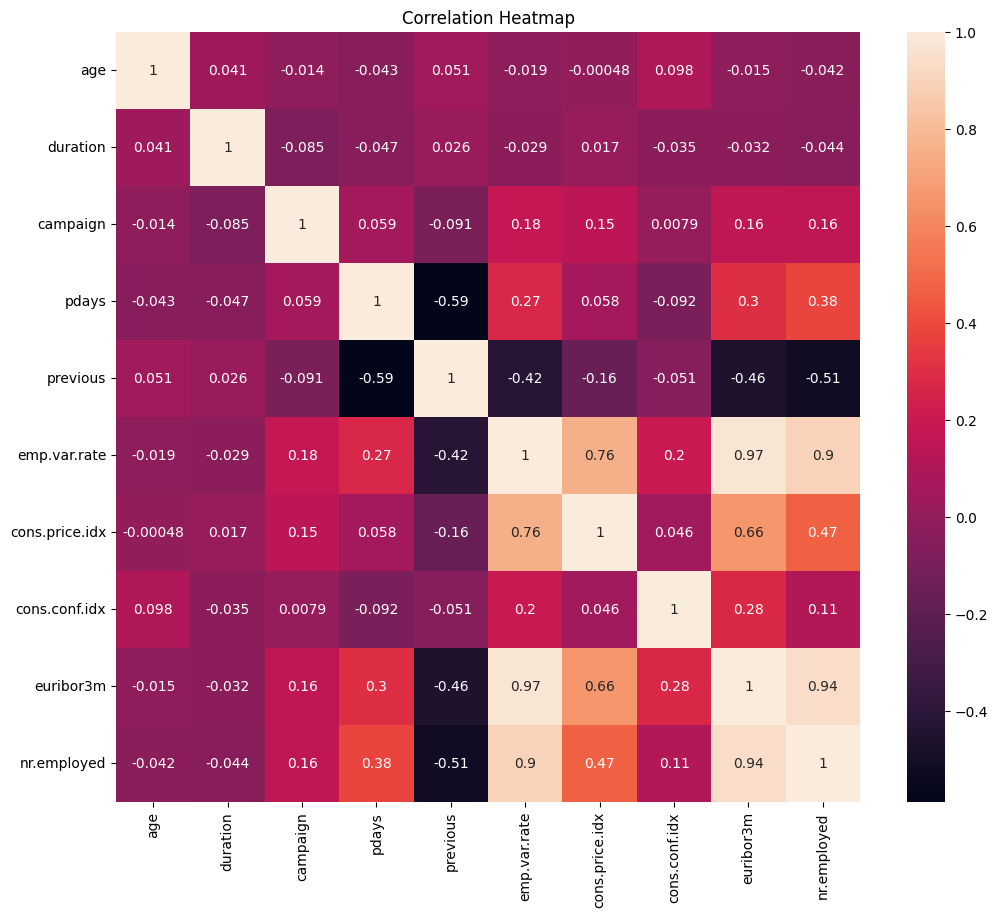

In [ ]:
# Creating a heat map
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = bank.select_dtypes(include=['number']).columns
corr_matrix = bank[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# replace categorical attributes by numerical ones using the method of LabelEncoder

# The LabelEncoder method assigns each unique category value an integer starting from 0.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply LabelEncoder to categorized columns
bank['job'] = le.fit_transform(bank['job'])
bank['marital'] = le.fit_transform(bank['marital'])
bank['education'] = le.fit_transform(bank['education'])
bank['housing'] = le.fit_transform(bank['housing'])
bank['loan'] = le.fit_transform(bank['loan'])
bank['contact'] = le.fit_transform(bank['contact'])
bank['month'] = le.fit_transform(bank['month'])
bank['day_of_week'] = le.fit_transform(bank['default'])
bank['duration'] = le.fit_transform(bank['duration'])
bank['default'] = le.fit_transform(bank['default'])
bank['poutcome'] = le.fit_transform(bank['poutcome'])
bank['y'] = le.fit_transform(bank['y'])

# Look
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,0,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,0,...,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,0,1,3,0,2,0,1,3,0,...,1,999,0,1,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,8,2,3,0,0,0,0,6,0,...,2,999,1,0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,0,1,3,0,0,0,0,1,0,...,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into attributes and target variable
X = bank.drop('y', axis=1)
y = bank['y']

# Separation of data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We evaluate the importance of features using two methods: Gradient Boosting and Random Forest

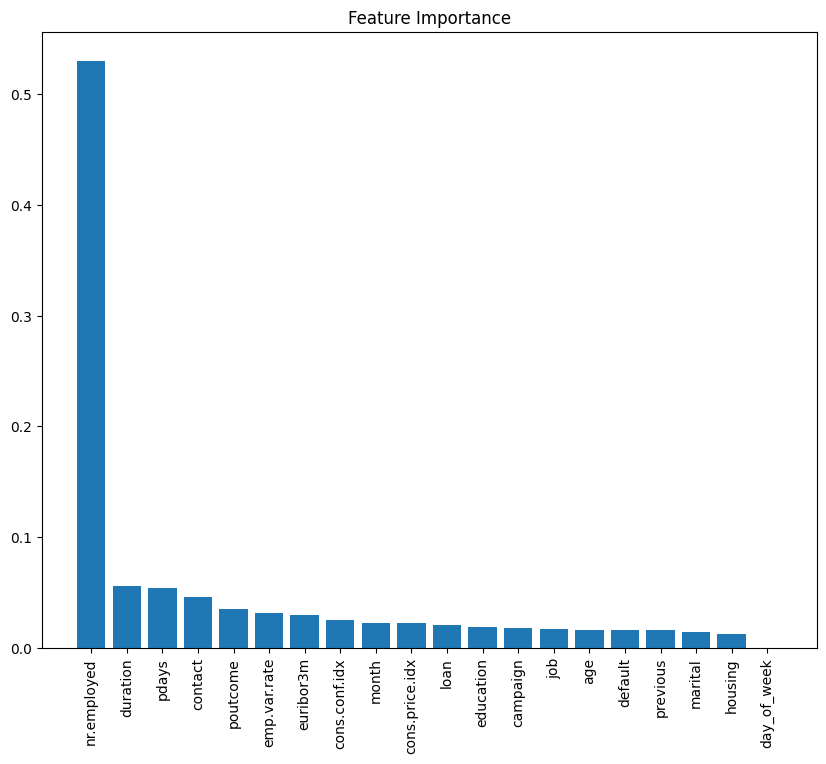

In [ ]:
# Importance of features.Gradient Boosting
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

model = XGBClassifier()
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.bar(range(len(indices)), feature_importances[indices], align='center')
plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
plt.show()

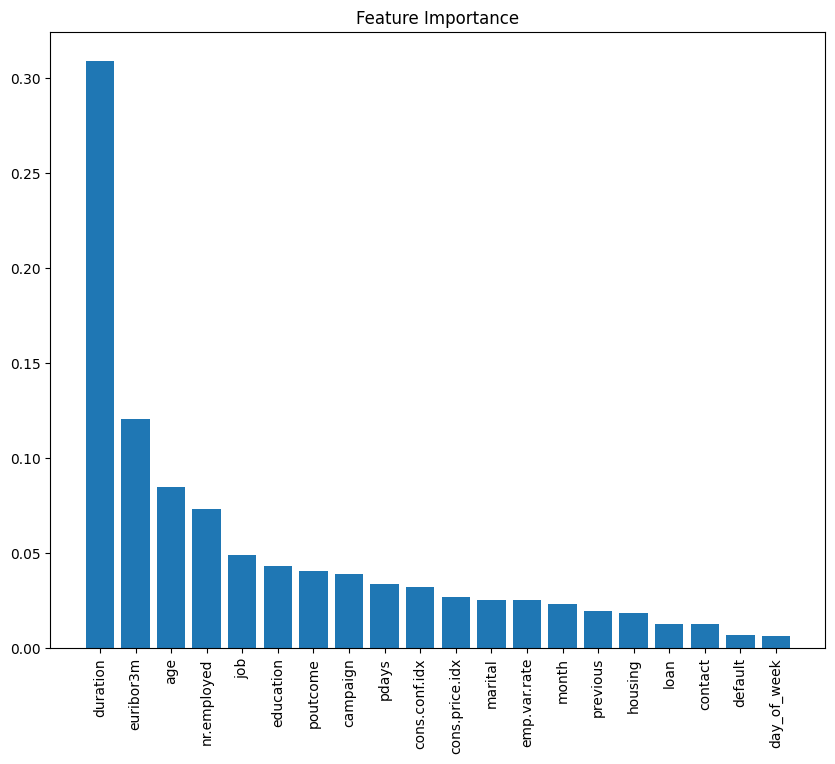

In [ ]:
# Importance of features.Random Forest
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.bar(range(len(indices)), feature_importances[indices], align='center')
plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
plt.show()

We see that some signs can be removed. But we will not delete them for the method of neural networks. In the future it is possible to try to leave 5-10 attributes and build a model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7306 - loss: 0.5769 - val_accuracy: 0.8920 - val_loss: 0.3648
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8906 - loss: 0.3255 - val_accuracy: 0.8968 - val_loss: 0.2744
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8955 - loss: 0.2555 - val_accuracy: 0.9126 - val_loss: 0.2393
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9136 - loss: 0.2163 - val_accuracy: 0.9078 - val_loss: 0.2239
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9077 - loss: 0.2089 - val_accuracy: 0.9053 - val_loss: 0.2194
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9156 - loss: 0.2048 - val_accuracy: 0.9029 - val_loss: 0.2178
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9220 - loss: 0.1828 - val_accuracy: 0.9066 - val_loss: 0.2189
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9307 - loss: 0.1746 - val_accuracy: 0.

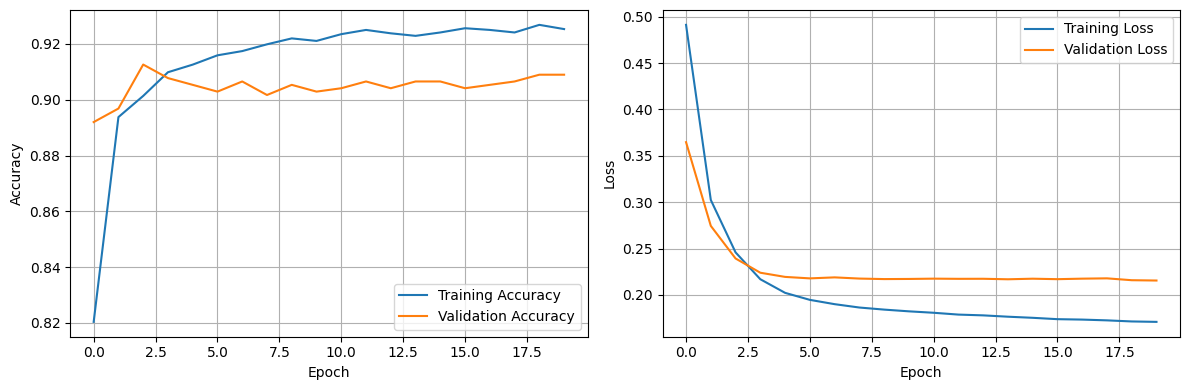

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Standardization of training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model architecture
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification. The output is two variants
])

# Model customization
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training a model
history = model.fit(X_train_scaled, y_train,
                    epochs=20,
                    validation_data=(X_test_scaled, y_test),
                    verbose=1)

# Evaluation of the model on test data
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Learning History Graphs
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# trying to build a model using cross-validation
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Create KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Checking the dimensionality of the data
if len(X_train_scaled) != len(y_train):
    raise ValueError("Размеры X_train_scaled и y_train должны совпадать.")

if isinstance(y_train, pd.DataFrame) or isinstance(y_train, pd.Series):
    y_train = y_train.values

# Initialize the list to store the results
cv_scores = []

for train_index, val_index in kfold.split(X_train_scaled):
    # Obtaining indices for training and validation
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]


    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])


    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


    history = model.fit(X_train_fold, y_train_fold,
                        epochs=20,
                        validation_data=(X_val_fold, y_val_fold),
                        verbose=1)


    _, acc = model.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(acc)

# Output the result
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)
print(f'average accuracy: {mean_cv_score * 100:.2f}%, standard deviation: {std_cv_score * 100:.2f}')

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7775 - loss: 0.5399 - val_accuracy: 0.8771 - val_loss: 0.3709
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8942 - loss: 0.3307 - val_accuracy: 0.8771 - val_loss: 0.3016
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8966 - loss: 0.2684 - val_accuracy: 0.8816 - val_loss: 0.2653
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9002 - loss: 0.2416 - val_accuracy: 0.8877 - val_loss: 0.2418
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9118 - loss: 0.2022 - val_accuracy: 0.8892 - val_loss: 0.2256
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9006 - loss: 0.2236 - val_accuracy: 0.8923 - val_loss: 0.2159
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9085 - loss: 0.2059 - val_accuracy: 0.8938 - val_loss: 0.2094
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9104 - loss: 0.1860 - val_accuracy: 0.8923 - val_loss: 0.2053
Epo

Good result !